# Program: Forecasting.ipynb
Author: Sanjeev Naguleswaran (adapted from various internet sources)

Date: March 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
air_passengers = pd.read_csv('/content/drive/MyDrive/Datasets/AirPassengers.csv', header = 0, parse_dates = True, names = ['Month', 'Passengers'], index_col = 'Month')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


HW

(144, 1)
            Passengers
Month                 
2010-01-01         112
2010-02-01         118
2010-03-01         132
2010-04-01         129
2010-05-01         121


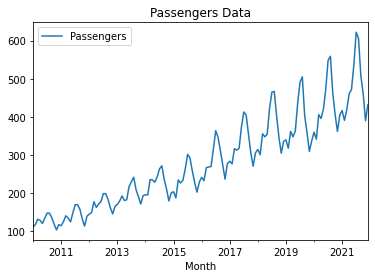

In [8]:
#finding shape of the dataframe
print(air_passengers.shape)
# having a look at the data
print(air_passengers.head())
# plotting the original data
air_passengers[['Passengers']].plot(title='Passengers Data')

# New section

In [9]:
log_air_passengers = np.log(air_passengers.Passengers)
log_air_passengers[1:10]

Month
2010-02-01    4.770685
2010-03-01    4.882802
2010-04-01    4.859812
2010-05-01    4.795791
2010-06-01    4.905275
2010-07-01    4.997212
2010-08-01    4.997212
2010-09-01    4.912655
2010-10-01    4.779123
Name: Passengers, dtype: float64

In [10]:
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()

In [11]:
log_air_passengers_diff.dropna(inplace=True)
log_air_passengers_diff[1:10]

Month
2010-03-01    0.112117
2010-04-01   -0.022990
2010-05-01   -0.064022
2010-06-01    0.109484
2010-07-01    0.091937
2010-08-01    0.000000
2010-09-01   -0.084557
2010-10-01   -0.133531
2010-11-01   -0.134733
Name: Passengers, dtype: float64

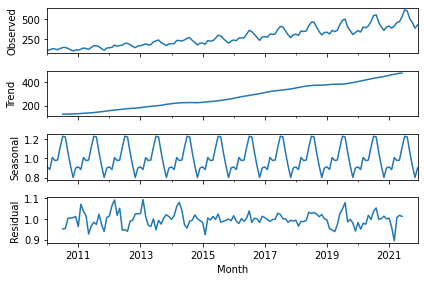

In [12]:
decompose_result = seasonal_decompose(air_passengers['Passengers'],model='multiplicative')

decompose_result.plot();

We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.


**Fitting the Data with Holt-Winters Exponential Smoothing**

---
Now we shall fit this data on Single, Double, and Triple Exponential Smoothing respectively, and will see how it performs.
Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.

In [13]:
# Set the frequency of the date time index as Monthly start as indicated by the data
air_passengers.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

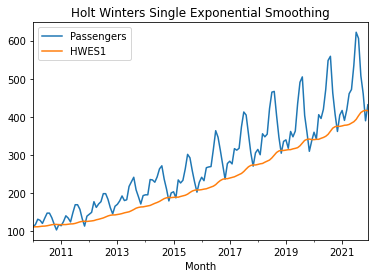

In [14]:
air_passengers['HWES1'] = SimpleExpSmoothing(air_passengers['Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues 
air_passengers[['Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

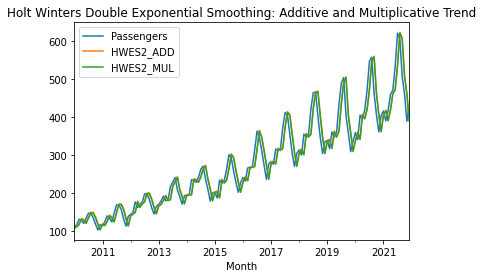

In [15]:
air_passengers['HWES2_ADD'] = ExponentialSmoothing(air_passengers['Passengers'],trend='add').fit().fittedvalues
air_passengers['HWES2_MUL'] = ExponentialSmoothing(air_passengers['Passengers'],trend='mul').fit().fittedvalues
air_passengers[['Passengers','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


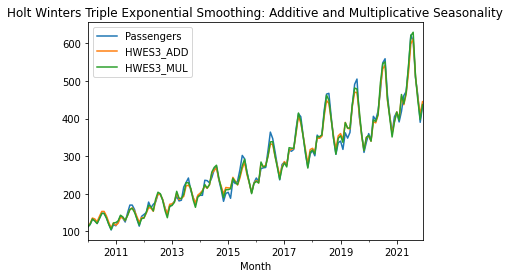

In [16]:
air_passengers['HWES3_ADD'] = ExponentialSmoothing(air_passengers['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

air_passengers['HWES3_MUL'] = ExponentialSmoothing(air_passengers['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

air_passengers[['Passengers','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

# **Forecasting with Holt-Winters Exponential Smoothing (Triple ES)**
Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set. We have taken 120 data points as Train set and the last 24 data points as Test Set.
forecast_data = pd.read_csv(‘air-passengers_passengers.csv’,index_col=’Month’,
parse_dates=True)
forecast_data.index.freq = ‘MS’


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:863: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:867: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(lvls[i - 1], dampen(b[i - 1], phi)) + \
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:865: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:875: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

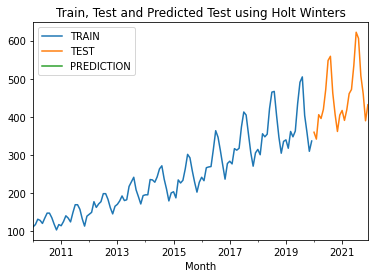

In [17]:
forecast_data = pd.read_csv('/content/drive/MyDrive/Datasets/AirPassengers.csv',index_col='Month', parse_dates=True) 
#forecast_data=air_passengers
forecast_data.index.freq = 'MS'

# Split into train and test set
train_passengers = forecast_data[:120]
test_passengers = forecast_data[120:]
fitted_model = ExponentialSmoothing(train_passengers['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_passengers['#Passengers'].plot(legend=True,label='TRAIN')
test_passengers['#Passengers'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

## ARIMA **Model**
Auto-Regressive Integrated Moving Average
In this case we're talking about a series with dependence among values 
# Nothing but a linear regression with a few times
# 1. The number of Auto-Regressive Terms (p)
# 2. The number of Moving Average Terms (q)
# 3. The number of differences taken

In [18]:
# Extract p and q from data
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_air_passengers_diff.values, nlags = 20)
lag_pacf = pacf(log_air_passengers_diff.values, nlags = 20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


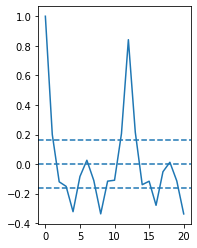

In [19]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

look at where the plot crosses the upper confidence interval for the first time
 for ACF this is 2 and gives us the p value

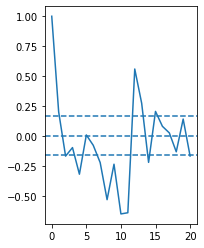

In [20]:
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

In [21]:
# look at where the plot crosses the upper confidence interval for the first time
# for PACF this is 2 and gives us the p value

In [22]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 1.5023')

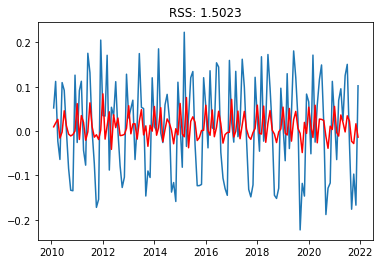

In [23]:
# AR model
model = ARIMA(log_air_passengers, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_air_passengers_diff)**2))

Text(0.5, 1.0, 'RSS: 1.4721')

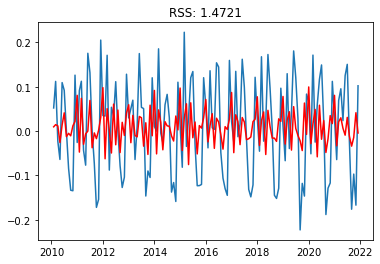

In [24]:
# MA model
model = ARIMA(log_air_passengers, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_air_passengers_diff)**2))

Going back to our example, we can create and fit an ARIMA model with AR of order 2, differencing of order 1 and MA of order 2.

Text(0.5, 1.0, 'RSS: 1.0292')

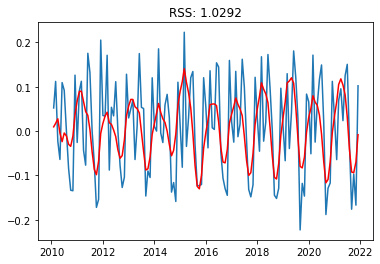

In [25]:
# ARIMA model
model = ARIMA(log_air_passengers, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(log_air_passengers_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_air_passengers_diff)**2))

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2010-02-01    0.009580
2010-03-01    0.017491
2010-04-01    0.027670
2010-05-01   -0.004521
2010-06-01   -0.023890
Freq: MS, dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2010-02-01    0.009580
2010-03-01    0.027071
2010-04-01    0.054742
2010-05-01    0.050221
2010-06-01    0.026331
Freq: MS, dtype: float64


In [28]:
predictions_ARIMA_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
2010-01-01    4.718499
2010-02-01    4.728079
2010-03-01    4.745570
2010-04-01    4.773241
2010-05-01    4.768720
Freq: MS, dtype: float64

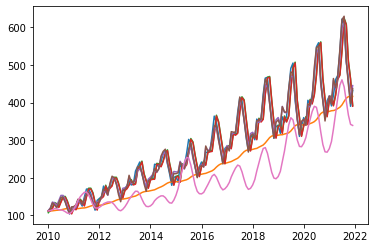

In [29]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(air_passengers)
plt.plot(predictions_ARIMA)

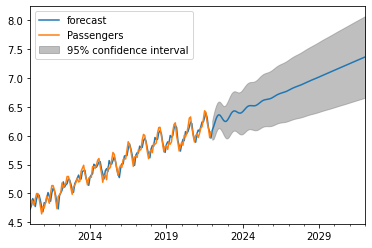

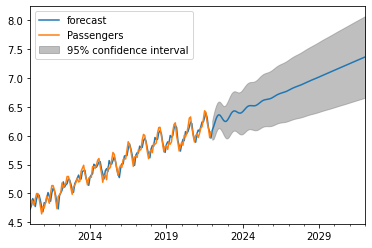

In [30]:
results_ARIMA.plot_predict(1,264)